# TPC1 - Representação de Dados e Integração Numérica

<ul>
    <li>Não deve escrever o seu nome nem nenhum código identificador em nenhum sítio. </li>
    <li>Deve entregar ESTE Notebook de Jupyter.</li>
    <li>O trabalho é individual. Podem e devem haver discussões com colegas mas o resultado entregue é individual. </li>
    <li>Não deve acrescentar ou apagar nenhuma célula. </li>
    <li>Todas as explicações devem ser claras e concisas. </li>
    <li>É preferível fazer menos e fazer bem que muito e mal. </li>
    <li>O método @jit(nopython=True) do pacote numba pode diminuir o tempo de cálculo.</li>
    <li>A não verificação de alguma destas regras leva ao anulamento e exclusão da prova.</li>
</ul>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as mt
from numba import jit
import time

# 1. Exercício - Campo elétrico de um disco ferroelétrico
O cálculo do campo eléctrico causado por uma densidade de carga fixa pode ser sempre escrito explicitamente como um integral multidimensional que soma todas as contribuições de elementos de carga no espaço. Salvo situações com grande simetria, estes integrais não são analiticamente resolúveis e os métodos de integração numérica tornam-se essenciais para resolver este problema fundamental da electroestática. Este vai ser o objectivo deste problema.<br>

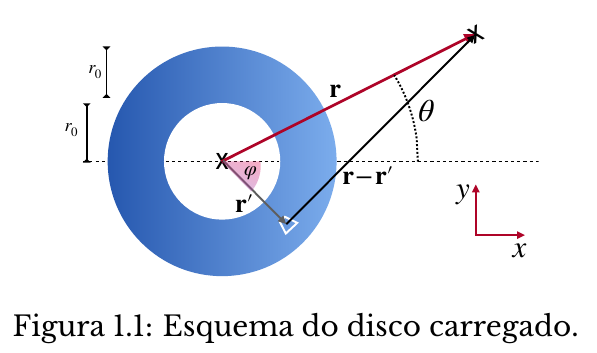

A duas dimensões, considere a coroa circular representada na Fig. 1.1 que suporta uma densidade de carga superficial fixa dada por 

$$ \sigma\left(\mathbf{r}'\right)=\sigma\left(r,\varphi\right)=\begin{cases}
\sigma_{e}\cos\left(2\varphi\right)\left(1+\cos^{3}\left(\varphi\right)\right) & \text{se }r_{0}<r<2r_{0}\\
0 & \text{outros casos}
\end{cases}, $$


onde $ \sigma_{e}$ tem unidades de carga eléctrica por unidade de área e $r_{0}$ é o raio interior da coroa circular. O potencial electrostático gerado por esta densidade de carga pode ser escrito como o seguinte integral a duas dimensões:

$$ V\!\left(\mathbf{r}\right)\!=\!\frac{1}{4\pi\varepsilon_{0}}\iint\!d^{{\scriptscriptstyle (2)}}\!\mathbf{r}^{\prime}\frac{\sigma\left(\mathbf{r}^{\prime}\right)}{\left|\mathbf{r}\!-\!\mathbf{r}^{\prime}\right|}, \,\,\,\,\,\,\,\,\,\, (1.2)$$

sendo que $\left|\mathbf{r}\!-\!\mathbf{r}^{\prime}\right|$ é dado, em termos dos ângulos $\varphi$ e $\theta$, pela expressão

$$ \left|\mathbf{r}\!-\!\mathbf{r}^{\prime}\right|=\sqrt{r^{2}\!+\!R^{2}\!-\!2rR\cos\left(\varphi\!+\!\theta\right)}, $$

onde $r\!=\!\left|\mathbf{r}^{\prime}\right|$ e $R\!=\!\left|\mathbf{r}\right|$. Usando esta parametrização, o potencial electrostático toma a forma de um integral em coordenadas polares,
$$
V\!\!\left(R,\theta\right)\!=\!\frac{\sigma_{e}}{4\pi\varepsilon_{0}}\int_{r_{0}}^{2r_{0}}\!\!\!\!\!\!\!\!rdr\!\!\int_{0}^{2\pi}\!\!\!\!\!\!\!d\varphi\frac{\cos\left(2\varphi\right)\left(1+\cos^{3}\left(\varphi\right)\right)}{\sqrt{r^{2}\!+\!R^{2}\!-\!2rR\cos\left(\varphi\!+\!\theta\right)}},\,\,\,\,\,\,\,\,\,\, (1.4)
$$
que vamos resolver e analisar nas perguntas seguintes.

<ol>
    <li>Antes de resolver o integral da Eq. 1.4, comece por escrever essa expressão em termos de quantidades adimensionais. Represente também o perfil de densidade de carga como função do ângulo polar $\varphi$.</li>
</ol>


#Responda Aqui
Efetuando a mudanças de variável $l = \frac{r}{r_0} \quad \text{e} \quad a=\frac{R}{r_0}$, obtém-se: 
$$ V(R,\theta) = \frac{\sigma_e \ r_0}{4 \ \pi \ \epsilon_0} \int_{1}^{2} \ \int_{0}^{2 \ \pi} \frac{\text{cos}(2 \ \varphi) \cdot (1+\text{cos}^3(\varphi))}{\sqrt{l^{2}-2 \ a \ l \ \text{cos}(\varphi+\theta)+a^2}} \ l \ d\varphi \ dl \qquad ,l = \frac{r}{r_0} \quad \text{e} \quad a=\frac{R}{r_0}$$
Assim, obtemos a seguinte expressão em termos de quantidades adimensionais:
$$ V'(R,\theta)=V(R,\theta) \frac{4 \ \pi \ \epsilon_0}{\sigma_e \ r_0} =  \int_{1}^{2} \ \int_{0}^{2 \ \pi} \frac{\text{cos}(2 \ \varphi) \cdot (1+\text{cos}^3(\varphi))}{\sqrt{l^{2}-2 \ a \ l \ \text{cos}(\varphi+\theta)+a^2}} \ l \ d\varphi \ dl \qquad ,l = \frac{r}{r_0} \quad \text{e} \quad a=\frac{R}{r_0}$$

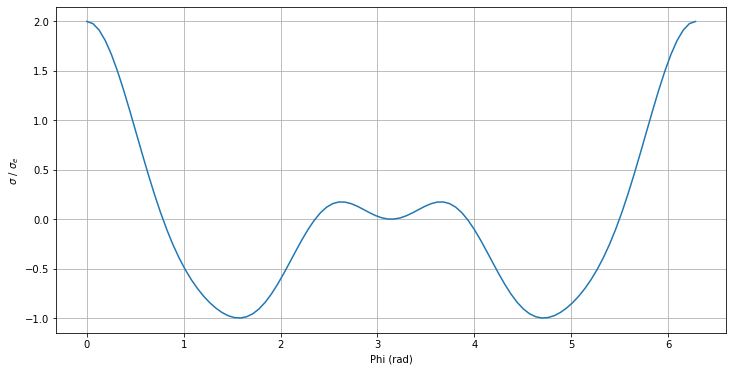

In [2]:
#Responda Aqui

def densidade_de_carga(r):
    """
    Reprensenta a densidade de carga em função do ângulo Phi
    r : distância ao centro da distribuição
    """
    r0=1
    if r0<r<2*r0:                                     #Verificar se r está na zona onde existe carga.
        phi=np.linspace(0,2*mt.pi,100)
        sigma=np.cos(2*phi)*(1+np.cos(phi)**3)
        plt.figure(figsize=(12,6))
        plt.plot(phi,sigma)
        plt.xlabel("Phi (rad)")
        plt.ylabel("$\sigma \ / \ \sigma_e$")
        plt.grid()
    else:                                             #Caso contrário, informar que é 0 para qualquer valor de theta
        return "A densidade de carga é nula"
densidade_de_carga(1.5)

<ol start=2>
    <li> Escreva uma função que calcule numericamente o integral $V(R,\theta)$ (adimensionalizado) para um qualquer par de valores $R>0$ e $\theta\in[0,2\pi]$. Para isto, siga os seguintes passos:<br><br>
        <ol type=A>
            <li>Reescreva o integral angular usando uma nova variável — $u\!=\!\cos\varphi$ — de modo a colocar o domínio de integração no intervalo canónico $[-1,1]$. [<b>Sugestão</b>: Se dividir o domínio $\varphi\in[0,2\pi]$ em dois intervalos, pode construír dois ramos nos quais a mudança de variável é injectiva.];</li><br>
            <li>Escreva uma rotina de quadratura de Gauss-Chebyshev para calcular o integral angular como função dos parâmetros $r$, $R$ e $\theta$. [<b>Sugestão</b>: O método de quadratura de Gauss-Chebyshev para uma função $f(x)$ é dada como

$$\int_{-1}^{1}\!\!\!dxf(x)\!=\!\sum_{k=0}^{N-1}w_{k}f(x_{k})\sqrt{1\!-\!x_{k}^{2}},$$
onde $x_{k}$ são as raízes do polinómio de Chebyshev $T_{n}\left(x\right)$ e $w_{k}$ são os correspondentes pesos de quadratura. Note que $\{x_{k}\}$ e $\{w_{k}\}$ são dados por $\mathtt{numpy.polynomial.chebyshev.chebgauss(N)}$, pelo menos até $N\!=\!100]$;</li><br>
            <li>Partindo do resultado do método anterior, escreva uma rotina que calcule o integral em $r$ com o método de Simpson 1/3.</li>
        </ol>
    </li>
</ol>

Responda a esta pergunta levando em conta <b>todas</b> as sub-alíneas anteriores.

#Responda Aqui

Utilizando as seguintes relações:
<ul>
    <li>$u = \text{cos}(\varphi) \qquad ; \qquad du = \text{sen}(\varphi) \ d\varphi \qquad ; \qquad d\varphi = \pm \frac{du}{\sqrt{1-u^2}}$</li>
    <li>$\text{cos}^2(\varphi) + \text{sin}^2(\varphi) = 1 \qquad \Leftrightarrow \qquad \text{sin}^2(\varphi) = 1 - u^2$</li>
    <li>$\text{cos}(\varphi + \theta) = \text{cos}(\varphi) \ \text{cos}(\theta) - \text{sin}(\varphi) \ \text{sin}(\theta)$</li>
</ul>
Dividindo o intervalo de integração em 2: 
<ul>
    <li>[0, $\pi$], onde $\qquad$ sen($\varphi$) = $\sqrt{1-u^2}$</li>
    <li>[$\pi$, $2\pi$], onde  $\qquad$ sen($\varphi$) = -$\sqrt{1-u^2}$</li>
</ul>
Obtém-se o integral, já adimensionalizado:
$$ \scriptsize V'(R,\theta) = \int_{1}^{2} \int_{-1}^{1} \left[\frac{1}{\sqrt{l^2 + a^2 -2 \ a \ l \ \left[u \ \text{cos}\theta - \sqrt{1-u^2} \ \text{sen}(\theta)\right]}}+\frac{1}{\sqrt{l^{2} + a^2 -2 \ a \ l \ \left[u \ \text{cos}\theta + \sqrt{1-u^2} \ \text{sen}(\theta)\right]}}\right] \ \frac{(2u^2 -1) \cdot (1+u^3) \cdot l }{\sqrt{1-u^2}}\ du \ dl \qquad , l = \frac{r}{r_0} \quad \text{e} \quad a=\frac{R}{r_0}$$

In [3]:
#Colocar fora da função para calcular somente 1 vez
N_raizes=100   #Número de Raízes para o polinómio de Chebyshev
u,w=𝚗p.𝚙𝚘𝚕𝚢𝚗𝚘𝚖𝚒𝚊𝚕.𝚌𝚑𝚎𝚋𝚢𝚜𝚑𝚎𝚟.𝚌𝚑𝚎𝚋𝚐𝚊𝚞𝚜𝚜(𝙽_raizes)   #Raízes e pesos da quadratura de Gauss-Chebyshev

def V(R,theta,N,u=u,w=w):
    """
    Calcula o potencial de um ponto em coordenadas polares (R,theta) segundo o método de simpson e
    da quadratura de Gauss-Chebyshev.
    
    Obrigatórias:
    R : Distância do ponto ao centro da distribuição de carga
    theta : Ângulo com a direção do eixo dos x
    N : Número de pontos para calcular segundo simpson
    
    Opcionais:
    u : Raízes do polinómio de Chebyshev
    w : Pesos do polinómio de Chebyshev
    """
    
    if N%2!=0:    #Garantir que N é par
        raise ValueError("N tem de ser par")
    h=(2-1)/N     #Calcular espaçamento da regra de Simpson
    r0=1          #Definir r0
    a=R/r0        #Calcular a
    
    #Definição de parâmetros para eficiência
    u_2=u**2
    a_2=a**2
    numerador= (2*u_2-1)*(1+u**3)
    k1=2*a*(u*np.cos(theta)-(1-u_2)**0.5*np.sin(theta))
    k2=2*a*(u*np.cos(theta)+(1-u_2)**0.5*np.sin(theta))
    
    #Método da Quadratura de Gauss-Chebyshev
    l=np.linspace(1,2,N+1)
    y=np.empty(N+1)
    for i in range(N+1):
        aux1=(l[i]**2+a_2-l[i]*k1)**-0.5
        aux2=(l[i]**2+a_2-l[i]*k2)**-0.5
        f=(aux1+aux2)*numerador*l[i]
        #Cálculo da Quadratura não tem a raiz(1-xk) porque corta com raiz(1-u) da função a integrar
        y[i]=np.sum(w*f)                       
        
    #Regra de Simpson
    return h/3*np.sum(y[1::2]*4+y[2::2]+y[:-1:2])

<ol start=3><li>Considere uma rede regular de pontos no quadrado $(x,y)\in[-5r_{0},5r_{0}]^{2}$. Utilize a função da alínea anterior para calcular $V(x,y)$ em todos os pontos dessa rede. Represente o resultado na forma de um gráfico de contorno. [<b>Sugestão</b>: $50^{2}$ pontos são suficientes para conseguir produzir um gráfico de contorno com boa resolução usando o método $\texttt{matplotlib.pyplot.contourf}]$.</li></ol>

#Responda Aqui

Criei uma grelha e a partir desta calculei os parâmetros $a$ e $\theta$ para cada ponto da grelha. Adicionei os valores de potencial para os diferentes $a$'s e $\theta$'s à 2D array Z.

Considerei 1000 intervalos para a regra de Simpson, 100 intervalos para a quadratura e uma rede de $50^2$.

Calculei o potencial para apenas metade dos pontos de y, pois por simetria consigo obter os restantes.

Note-se a existência de um foco de pontecial positivo e dois focos de potencial negativo.

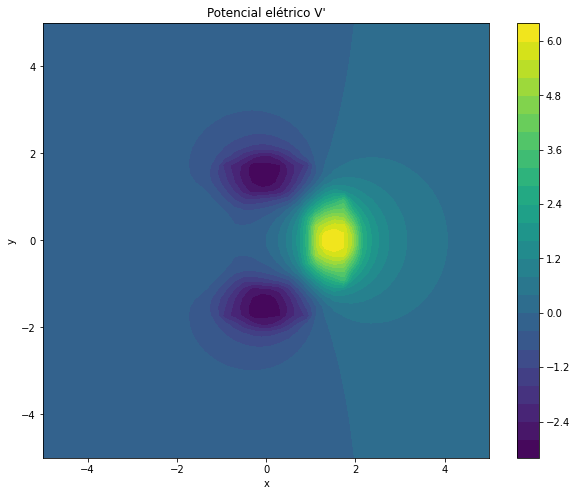

In [18]:
#Responda Aqui

x,y=np.mgrid[-5:5:50j,-5:5:50j]   #Usar para criar a rede regular

a=(x**2+y**2)**0.5                #Calcular os diferentes a=R/r0
theta=np.arctan2(y,x)             #Calcular os diferentes theta
Z=np.empty([50,50])               #2D array para guardar os potenciais

#Calcular os valores de potencial
for i in range(50):
    for j in range(25):
        Z[i,j]=V(a[i,j],theta[i,j],1000)

#Aproveitar a simetria em relação a y
Z[:,25:]=Z[:,24::-1]

#Criar gráfico de contornos
plt.figure(figsize=(10,8))
plt.title("Potencial elétrico V'")
plt.contourf(x,y,Z,extent=(-5,5,-5,5),levels=30)
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar()

<ol start=4><li>Centrando-se no eixo $\theta\!=\!0$, represente $V(R,\theta\!=\!0)$ até $R\!=\!10^{7}r_{0}$. Analise o comportamento assimptótico do potencial electrostático no limite de longas distâncias. Repita a análise para $\theta\!=\!\pi/2$; Obteve o mesmo comportamento? Interprete este resultado tendo em conta o que espera para expansão multipolar de $V\!\left(\mathbf{r}\right)$. </li></ol>

#Responda Aqui

Pelo gráfico, é visível que para $\theta=0$ o potencial V é inversamente proporcional a $R^2$, ou seja, o termo dipolar domina.

Para $\theta=\frac{\pi}{2}$, o potencial V é inversamente proporcional a $R^3$, ou seja, o termo quadrupolar domina.

Esta dependência é visível nos declives, dado que ao linearizar a expressão, obtém-se um declive igual ao expoente de R. Apenas se analisam valores naturais para o expoente, pois sabe-se pela expansão multipolar que o expoente tem de ser 1,2,3,...

Pequenos desvios às retas de ajuste devem-se essencialmente à existência de termos de maior ordem nas espansões. 

As retas foram ajustadas, tendo em conta as correções calculadas na alínea seguinte, da seguinte forma:
$$
log(V) = log(\text{correção}) + \alpha \ log(R)
$$, onde $\alpha$ é o expoente do R.

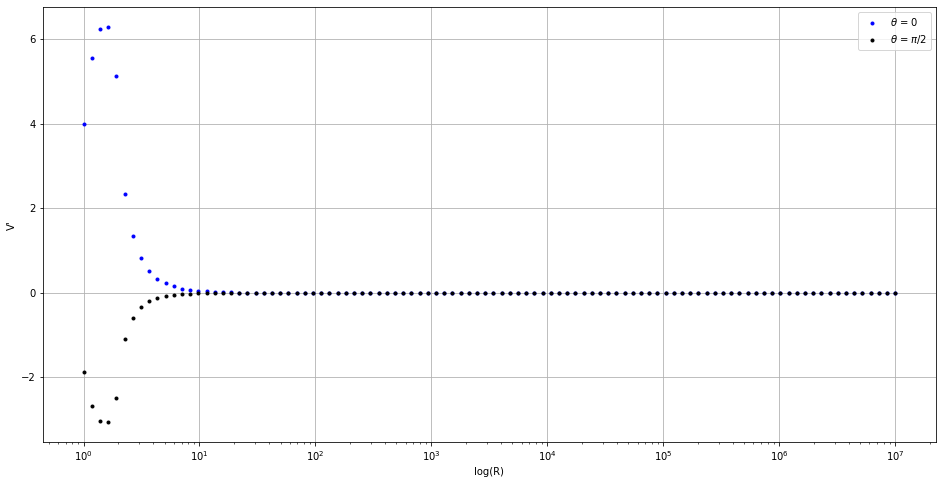

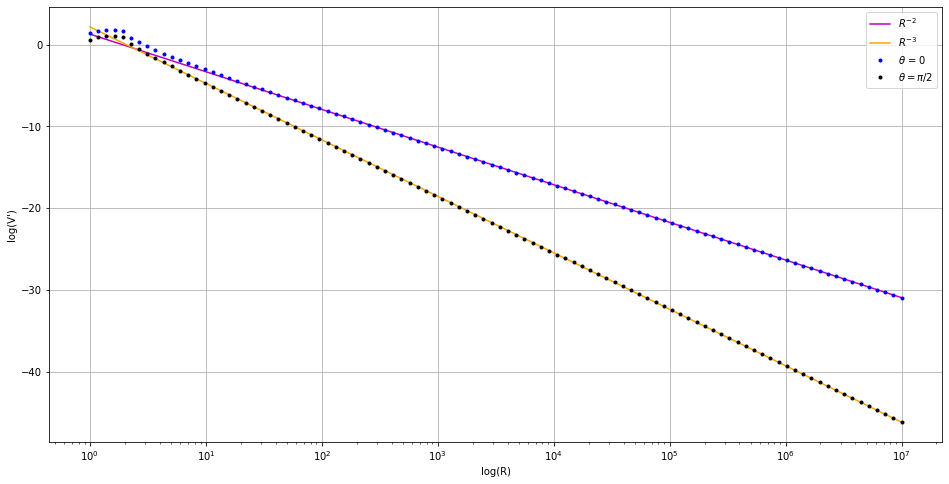

In [14]:
# Responda Aqui

x=np.logspace(0,7,100)   #Espaçamento logarítmico
y1=np.empty(100)         #Vetor para o potencial para theta=0
y2=np.empty(100)         #Vetor para o potencial para theta=pi/2

for i in range(100):   #Calcular os Valores de potencial
    y1[i]=V(x[i],0,500)
    y2[i]=V(x[i],mt.pi/2,500)
    
#Especificações para o gráfico escala normal eixo dos y
plt.figure(figsize=(16,8))  

#Plot dos dados
plt.plot(x,y1,"b.",label=r"$\theta$ = 0")
plt.plot(x,y2,"k.", label=r"$\theta$ = $\pi$/2")

#Criar gráfico
plt.xscale("log")
plt.xlabel("log(R)")
plt.ylabel("V'")
plt.legend()
plt.grid()
plt.show()



#Especificações para o gráfico escala logarítmica eixo dos y 
plt.figure(figsize=(16,8))

#Comportamento esperado
dif1=np.log(3.665198)       #alinhar o ajuste tendo em conta as correções teóricas
dif2=np.log(8.835729)       #alinhar o ajuste tendo em conta as correções teóricas
plt.plot(x,np.log(1/x**2)+dif1,"m" , label="$R^{-2}$")
plt.plot(x,np.log(1/x**3)+dif2,color="orange",label="$R^{-3}$")

#Comportamento real
plt.plot(x,np.log(y1),"b.",label=r"$\theta$ = 0")
plt.plot(x,np.log(-y2),"k.", label=r"$\theta = \pi/2$")    #Trabalha-se com -y2 porque y2 tem valores negativos

#Criar gráfico
plt.xscale("log")
plt.xlabel("log(R)")
plt.ylabel("log(V')")
plt.legend()
plt.grid()
plt.show()

<ol start=5><li> Formalmente, faça a expansão multipolar da Eq. 1.4 até à ordem quadrupolar. Implemente um método de Romberg adaptativo e calcule numericamente o vector dipolar eléctrico e a correcção quadrupolar para o eixo $\theta\!=\!\pi/2$. Compare estes resultados com as suas conclusões da alínea anterior. [<b>Sugestão</b>: Utilize a conhecida expansão — $1/\sqrt{1+x}\approx1-\frac{x}{2}+\frac{3x^{2}}{8}+\mathcal{O}\left(x^{3}\right)$ — e coleccione ordens apenas até $(r/R)^{2}$. No cálculo numérico coloque uma tolerância de $10^{-6}$ no erro do integral].</li></ol>

#Responda Aqui

O vetor dipolar elétrico é dado por:
$$
\vec{p}=\iint_S \vec{r} \ \sigma(\vec{r}) \ dS = \left(\int_{r_0}^{2 \ r_0} r^2 dr\int_{0}^{2 \ \pi} d\varphi \cos(\varphi)\cos(2 \ \varphi)(1+\cos^3(\varphi))  \ , \ \int_{r_0}^{2 \ r_0} r^2 dr\int_{0}^{2 \ \pi} d\varphi \sin(\varphi)\cos(2 \ \varphi)(1+\cos^3(\varphi)) \right)
$$
$$
\vec{p}=\frac{7}{3}r_0^3\left( \int_{0}^{2 \ \pi} d\varphi \cos(\varphi)\cos(2 \ \varphi)(1+\cos^3(\varphi))  \ , \ \int_{0}^{2 \ \pi} d\varphi \sin(\varphi)\cos(2 \ \varphi)(1+\cos^3(\varphi)) \right)
$$
Assim, definimos o vetor dipolar elétrico adimensionalizado:
$$
\vec{p}' = \frac{\vec{p}}{r_0^3}=\frac{7}{3}\left( \int_{0}^{2 \ \pi} d\varphi \cos(\varphi)\cos(2 \ \varphi)(1+\cos^3(\varphi))  \ , \ \int_{0}^{2 \ \pi} d\varphi \sin(\varphi)\cos(2 \ \varphi)(1+\cos^3(\varphi)) \right)
$$
<br>
A expansão multipolar é derivada a partida da equação:
$$
\scriptsize
\frac{1}{\sqrt{r^{2}\!+\!R^{2}\!-\!2rR\cos\left(\varphi\!+\!\theta\right)}} = \frac{1}{R \ \sqrt{\left(\frac{r}{R}\right)^2\!+\!1\!-\!2\frac{r}{R}\cos\left(\varphi\!+\!\theta\right)}} = \frac{1}{R \ \sqrt{a+\!1}} \quad , a=\left(\frac{r}{R}\right)^2\!-\!2\frac{r}{R}\cos\left(\varphi\!+\!\theta\right)
$$
Expandido até ao termo quadrupolar:
$$
\scriptsize
\frac{1}{R \ \sqrt{a+\!1}} \approx \frac{1}{R} - \frac{a}{2R} + \frac{a^2}{8R} \approx \frac{1}{R}\left[ 1 + \cos(\varphi+\theta)\frac{r}{R} +\frac{1}{2}\left( 3 \cos(\varphi+\theta)^2 - 1 \right)\left( \frac{r}{R} \right)^2 \right]
$$
Assim, a partir da equação 1.4: <br>
Monopolo:
$$
\scriptsize
\frac{4\pi\varepsilon_{0}}{\sigma_{e}} \ V_{\text{Monopolo}} = \frac{1}{R}\int_{r_{0}}^{2r_{0}}\!\!\!\!\!\!\!\!rdr\!\!\int_{0}^{2\pi}\!\!\!\!\!\!\!d\varphi\cos\left(2\varphi\right)\left(1+\cos^{3}\left(\varphi\right)\right) \Leftrightarrow \frac{4\pi\varepsilon_{0}}{\sigma_{e} \ r_0} \ V_{\text{Monopolo}} = \frac{3}{2} \ \frac{r_0}{R}\!\!\int_{0}^{2\pi}\!\!\!\!\!\!\!d\varphi\cos\left(2\varphi\right)\left(1+\cos^{3}\left(\varphi\right)\right)
$$
Dipolo:
$$
\scriptsize
\frac{4\pi\varepsilon_{0}}{\sigma_{e}} \ V_{\text{Dipolo}} = \frac{1}{R^2}\int_{r_{0}}^{2r_{0}}\!\!\!\!\!\!\!\!r^2dr\!\!\int_{0}^{2\pi}\!\!\!\!\!\!\!d\varphi\cos\left(2\varphi\right)\left(1+\cos^{3}\left(\varphi\right)\right)\cos(\varphi + \theta) \Leftrightarrow \frac{4\pi\varepsilon_{0}}{\sigma_{e} \ r_0} \ V_{\text{Dipolo}} = \frac{7}{3} \ \left(\frac{r_0}{R}\right)^2\!\!\int_{0}^{2\pi}\!\!\!\!\!\!\!d\varphi\cos\left(2\varphi\right)\left(1+\cos^{3}\left(\varphi\right)\right)\cos(\varphi + \theta) 
$$
Quadrupolo:
$$
\scriptsize
\frac{4\pi\varepsilon_{0}}{\sigma_{e}} \ V_{\text{Quadrapolo}} = \frac{1}{2 \ R^3}\int_{r_{0}}^{2r_{0}}\!\!\!\!\!\!\!\!r^3dr\!\!\int_{0}^{2\pi}\!\!\!\!\!\!\!d\varphi\cos\left(2\varphi\right)\left(1+\cos^{3}\left(\varphi\right)\right)\left[3\cos^2(\varphi + \theta)-1\right] \Leftrightarrow \frac{4\pi\varepsilon_{0}}{\sigma_{e} \ r_0} \ V_{\text{Quadrupolo}} = \frac{15}{8} \ \left(\frac{r_0}{R}\right)^3\!\!\int_{0}^{2\pi}\!\!\!\!\!\!\!d\varphi\cos\left(2\varphi\right)\left(1+\cos^{3}\left(\varphi\right)\right)\left[3 \ \cos^2(\varphi + \theta)-1\right] 
$$
<br>
Os resultados estão de acordo com as conclusões da alínea anterior. Verficou-se que os termos do monopolo e do dipolo são nulos para $\theta$=$\pi$/2, logo o potencial cai com $R^3$, o que vai de encontro ao gráfico da alínea anterior. Outra forma de ver isto é, sabendo que o potencial dipolar é dado por:
$$
V_{Dipolar} \propto \vec{p} \cdot \vec{r} = p \ r \ cos(\theta)
$$
Assim, como $\vec{p}'$ tem direção do eixo dos x, para $\theta$=$\pi$/2, tem-se que $V_{Dipolar}$ é nulo, tal como se verificou. Contudo, para $\theta$=0, este produto não é nulo, o que faz com que a dependência de $V_{Dipolar}$ seja com 1/$R^2$, o que é evidenciado no gráfico da alínea anterior.
<br>
Também foi calculado o $V_{Monopolo}$ e concluiu-se que este é nulo dado que a carga total é nula.

In [16]:
# Responda Aqui

#Regra do trapézio
def trapezio(a,b,N,f):
    """
    Calcular o integral de uma função segundo a regra do trapézio.
    
    a : Limite inferior de integração
    b : Limite superior de integração
    N : Número de intervalos
    f : função a integrar (com um parâmetro)
    """
    h=(b-a)/N
    x=np.linspace(a,b,N+1)
    y=f(x)
    return h/2*np.sum(y[1:]+y[:-1])

#Método de romberg com a função a integrar como parâmetro obrigatório
def romberg(f,p=1e-6,a=0,b=2*np.pi):
    """
    Calcular o integral de uma função segundo o método de romberg com uma determinada precisão.
    
    Obrigatório:
    f : função a integrar
    
    Opcional:
    p : precisão do integral
    a : limite inferior de integração
    b : limite superior de integração
    """
    S = lambda N,h,f : h*np.sum(f(a+np.arange(1,N,2)*h))
    
    R=np.zeros([50,50])
    i,N=0,2   #Escolher o N inicial
    R[0,0]=trapezio(a,b,N,f)
    erro=1
    
    while abs(erro) > p:
        i+=1
        N*=2
        h=(b-a)/N
        R[i,0]=R[i-1,0]/2+S(N,h,f)
        for m in range(i):
            erro=1/(4**(m+1)-1)*(R[i,m]-R[i-1,m])
            R[i,m+1]=R[i,m]+erro
    return R[i,i]

#componente dos x
px=7/3*romberg(f = lambda x : np.cos(2*x)*(1+np.cos(x)**3)*np.cos(x))

#componente dos y
py=7/3*romberg(f = lambda x : np.cos(2*x)*(1+np.cos(x)**3)*np.sin(x))

#Vetor dipolar elétrico, coordenadas cartesianas:
p=[px,py]
print("Vetor dipolar elétrico adimensionalizado: [" + "{0:.6f}".format(px) + ", " + "{0:.6f}".format(py) + "]")

"-------------------------------------------------------------------------------------------------------------------------"

#Calcular os integrais das funções
#Considere-se r0 = 1

#Correção monopolar para qualquer theta
fM=lambda x : np.cos(2*x)*(1+np.cos(x)**3)                               #Função
VM=3/2*romberg(fM)                                                       #Valor

#Correção dipolar para theta=pi/2
fD=lambda x : np.cos(2*x)*(1+np.cos(x)**3)*np.cos(x+np.pi/2)             #Função
VD=7/3*romberg(fD)                                                       #Valor

#Correção Quadrupolar para theta=pi/2
fQ=lambda x : np.cos(2*x)*(1+np.cos(x)**3)*(3*np.cos(x+np.pi/2)**2-1)    #Função
VQ=15/8*romberg(fQ)                                                      #Valor

#Correção dipolar para theta=0
fD0=lambda x : np.cos(2*x)*(1+np.cos(x)**3)*np.cos(x)                     #Função
VD0=7/3*romberg(fD0)                                                      #Valor


print("Correção monopolar: ", "{0:.6f}".format(VM))
print("Correção dipolar para theta=pi/2 :", "{0:.6f}".format(VD))
print("Correção quadrupolar para theta=pi/2: " + "{0:.6f}".format(VQ))
print("Como a precisão é 1e-6, conclui-se que os termos do potencial do monopolo (para qualquer theta) e do dipolo (para theta = pi/2) são nulos.")
print("Correção dipolar para theta=0:", "{0:.6f}".format(VD0))

Vetor dipolar elétrico adimensionalizado: [3.665198, -0.000000]
Correção monopolar:  -0.000000
Correção dipolar para theta=pi/2 : 0.000000
Correção quadrupolar para theta=pi/2: -8.835729
Como a precisão é 1e-6, conclui-se que os termos do potencial do monopolo (para qualquer theta) e do dipolo (para theta = pi/2) são nulos.
Correção dipolar para theta=0: 3.665198


# 2. Exercício - Carga Induzida Num Condutor Perfeito

No exercício anterior determinou-se o potencial eléctrico causado pela distribuição de carga estática na coroa circular. 

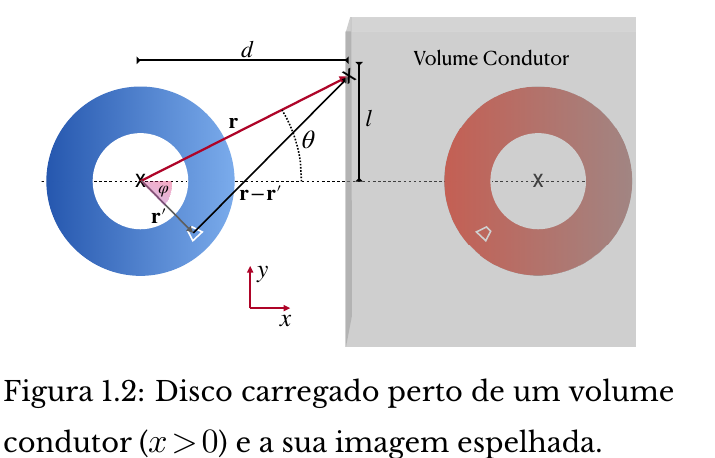

No entanto, se esta for colocada nas proximidades de um condutor volúmico ideal (como representado na Fig. 1.2), uma distribuição de cargas será induzida na superfície do condutor $(x\!=\!0)$ de modo a anular o campo no seu interior. Tomando esta carga superficial em consideração, o campo elétrico passa a ser perpedicular à superficie do condutor, sendo $E_{x}\left(x\right)$ uma função descontínua a $x\!=\!0$. Para calcular <b>o campo elétrico fora do volume condutor</b> podemos usar o método das imagens, onde se sobrepõem os campos criados pelo disco e pela sua imagem reflectida de carga oposta (como representado na Fig. 1.2).

<ol><li>Usando a Eq. 1.2, mostre que a componente segundo $x$ do campo eléctrico devido apenas à coroa circular pode ser escrita como:

$$ 
E_{x}\left(R,\theta\right)=\!\frac{\sigma_{e}}{4\pi\varepsilon_{0}}\int_{r_{0}}^{2r_{0}}\!\!\!\!\!\!\!\!rdr\!\!\int_{0}^{2\pi}\!\!\!\!\!\!\!d\varphi\frac{\left(R\cos\theta-r\cos\varphi\right)\cos\left(2\varphi\right)\left(1+\cos^{3}\left(\varphi\right)\right)}{\left(r^{2}\!+\!R^{2}\!-\!2rR\cos\left(\varphi\!+\!\theta\right)\right)^{\frac{3}{2}}}.\,\,\,\,\,\,\,\,\,\, (1.5) $$
    [<b>Sugestão:</b> Note que $E_{x}\!=\!-\partial V(\mathbf{r})/\partial x.]$</li>
</ol>

#Responda Aqui

Pela equação 1.4, sabe-se que:
$$
V\!\!\left(R,\theta\right)\!=\!\frac{\sigma_{e}}{4\pi\varepsilon_{0}}\int_{r_{0}}^{2r_{0}}\!\!\!\!\!\!\!\!rdr\!\!\int_{0}^{2\pi}\!\!\!\!\!\!\!d\varphi\frac{\cos\left(2\varphi\right)\left(1+\cos^{3}\left(\varphi\right)\right)}{\sqrt{r^{2}\!+\!R^{2}\!-\!2rR\cos\left(\varphi\!+\!\theta\right)}},\,\,\,\,\,\,\,\,\,\, (1.4)
$$
Sabendo que: $\text{cos}(\varphi+\theta)=\text{cos}(\varphi)\ \text{cos}(\theta) - \text{sin}(\varphi)\ \text{sin}(\theta)$, obtém-se:
$$
V\!\!\left(R,\theta\right)\!=\!\frac{\sigma_{e}}{4\pi\varepsilon_{0}}\int_{r_{0}}^{2r_{0}}\!\!\!\!\!\!\!\!rdr\!\!\int_{0}^{2\pi}\!\!\!\!\!\!\!d\varphi\frac{\cos\left(2\varphi\right)\left(1+\cos^{3}\left(\varphi\right)\right)}{\sqrt{r^{2}\!+\!R^{2}\!-\!2rR(\text{cos}(\varphi)\ \text{cos}(\theta) - \text{sin}(\varphi)\ \text{sin}(\theta))}}
$$
Convertendo coordenadas polares para cartesianas: $x=R \ \text{cos}(\theta)$ e $y=R \ \text{sin}(\theta)$
$$
V\!\!\left(x,y\right)\!=\!\frac{\sigma_{e}}{4\pi\varepsilon_{0}}\int_{r_{0}}^{2r_{0}}\!\!\!\!\!\!\!\!rdr\!\!\int_{0}^{2\pi}\!\!\!\!\!\!\!d\varphi\frac{\cos\left(2\varphi\right)\left(1+\cos^{3}\left(\varphi\right)\right)}{\sqrt{r^{2}\!+x^{2}\!+\!y^{2}\!-\!2r(x \ \text{cos}(\varphi) - y \ \text{sin}(\varphi))}}
$$
Derivando em ordem a x,
$$
\frac{\partial V\!\!\left(x,y\right)}{\partial x}\!=\!-\frac{\sigma_{e}}{4\pi\varepsilon_{0}}\int_{r_{0}}^{2r_{0}}\!\!\!\!\!\!\!\!rdr\!\!\int_{0}^{2\pi}\!\!\!\!\!\!\!d\varphi\frac{(x-r \ cos(\varphi))\cos\left(2\varphi\right)\left(1+\cos^{3}\left(\varphi\right)\right)}{\left[r^{2}\!+x^{2}\!+\!y^{2}\!-\!2r(x \ \text{cos}(\varphi) - y \ \text{sin}(\varphi))\right]^{3/2}}
$$
Sendo $E_{x}\!=\!-\partial V(x,y)/\partial x$ e voltando a coordenadas polares obtém-se:
$$ 
E_{x}\left(R,\theta\right)=\!\frac{\sigma_{e}}{4\pi\varepsilon_{0}}\int_{r_{0}}^{2r_{0}}\!\!\!\!\!\!\!\!rdr\!\!\int_{0}^{2\pi}\!\!\!\!\!\!\!d\varphi\frac{\left(R\cos\theta-r\cos\varphi\right)\cos\left(2\varphi\right)\left(1+\cos^{3}\left(\varphi\right)\right)}{\left(r^{2}\!+\!R^{2}\!-\!2rR\cos\left(\varphi\!+\!\theta\right)\right)^{\frac{3}{2}}}$$, tal como queríamos demonstrar.

In [7]:
# Responda Aqui

<ol start=2><li> A partir da Eq. 1.5, deduza a seguinte expressão do campo $E_{x}$ <b>causado pela coroa circular carregada</b> em $x\!=\!0$ como função da distância $(l)$ ao eixo tracejado na Fig. 1.2:

$$ E_{x}\left(l\right)=\!\frac{\sigma_{e}}{4\pi\varepsilon_{0}}\int_{r_{0}}^{2r_{0}}\!\!\!\!\!\!\!\!rdr\!\!\int_{0}^{2\pi}\!\!\!\!\!\!\!d\varphi\frac{\left(d-r\cos\varphi\right)\cos\left(2\varphi\right)\left(1+\cos^{3}\left(\varphi\right)\right)}{\left(r^{2}\!+\!d^{2}\!+l^{2}\!-\!2r\left[d\cos\left(\varphi\right)\!-\!l\sin\left(\varphi\right)\right]\right)^{\frac{3}{2}}}. $$

</li>
</ol>

A partir da expressão já calculada:
$$
\frac{\partial V\!\!\left(x,y\right)}{\partial x}\!=\!-\frac{\sigma_{e}}{4\pi\varepsilon_{0}}\int_{r_{0}}^{2r_{0}}\!\!\!\!\!\!\!\!rdr\!\!\int_{0}^{2\pi}\!\!\!\!\!\!\!d\varphi\frac{(x-r \ cos(\varphi))\cos\left(2\varphi\right)\left(1+\cos^{3}\left(\varphi\right)\right)}{\left[r^{2}\!+x^{2}\!+\!y^{2}\!-\!2r(x \ \text{cos}(\varphi) - y \ \text{sin}(\varphi))\right]^{3/2}}
$$
Sendo $E_{x}\!=\!-\partial V(x,y)/\partial x$, obtém-se:
$$
E_{x}\left(x,y\right)\!=\!\frac{\sigma_{e}}{4\pi\varepsilon_{0}}\int_{r_{0}}^{2r_{0}}\!\!\!\!\!\!\!\!rdr\!\!\int_{0}^{2\pi}\!\!\!\!\!\!\!d\varphi\frac{(x-r \ cos(\varphi))\cos\left(2\varphi\right)\left(1+\cos^{3}\left(\varphi\right)\right)}{\left[r^{2}\!+x^{2}\!+\!y^{2}\!-\!2r(x \ \text{cos}(\varphi) - y \ \text{sin}(\varphi))\right]^{3/2}}
$$
Fazendo; $d=x$ ; $l=y$ e fixando d:
$$
E_{x}\left(l\right)\!=\!\frac{\sigma_{e}}{4\pi\varepsilon_{0}}\int_{r_{0}}^{2r_{0}}\!\!\!\!\!\!\!\!rdr\!\!\int_{0}^{2\pi}\!\!\!\!\!\!\!d\varphi\frac{(d-r \ cos(\varphi))\cos\left(2\varphi\right)\left(1+\cos^{3}\left(\varphi\right)\right)}{\left[r^{2}\!+d^{2}\!+\!l^{2}\!-\!2r(d \ \text{cos}(\varphi) - l \ \text{sin}(\varphi))\right]^{3/2}}
$$, tal como queríamos demonstrar.
<br>

In [8]:
# Responda Aqui

<ol start=3><li> Utilizando o método das imagens — Fig. 1.2 — generalize a expressão anterior para o campo $E_x$ completo criado pelo anel e a sua imagem de espelho.</li></ol>

#Responda Aqui

Dado que a distribuição de carga da imagem é o simétrico da distribuição real segundo a superfície externa do condutor e tem carga com sinal contrário, a contribuição da imagem segundo a direção x é o dobro da do campo calculado na alínea 2.2. Além disso, as componentes segundo y anulam-se, o que vai de acordo com a componente paralela do campo ser nula na superfície de um condutor. Assim, obtemos a equação:
$$
E_{xTotal} = 2 \ E_x
$$
Substituindo E_x:
$$
E_{xTotal}\left(l\right)\!=\!\frac{2 \ \sigma_{e}}{4\pi\varepsilon_{0}}\int_{r_{0}}^{2r_{0}}\!\!\!\!\!\!\!\!rdr\!\!\int_{0}^{2\pi}\!\!\!\!\!\!\!d\varphi\frac{(d-r \ cos(\varphi))\cos\left(2\varphi\right)\left(1+\cos^{3}\left(\varphi\right)\right)}{\left[r^{2}\!+d^{2}\!+\!l^{2}\!-\!2r(d \ \text{cos}(\varphi) - l \ \text{sin}(\varphi))\right]^{3/2}}
$$
<br>
Isto é facilmente verificado porque para cada elemento de carga positivo, existe um elemento de carga negativa na posição simétrica segundo a superfície do condutor. Isto é visível na figura 1.2.

In [9]:
# Responda Aqui

<ol start=4><li>Construa uma função $\mathtt{python}$ que calcule numericamente o integral da equação da alínea anterior e devolva $E_{x}$ para qualquer valor $l\in\mathbb{R}$ na superfície externa do condutor (assuma $d\!=\!5r_{0}$). [<b>Sugestão</b>: Siga um procedimento semelhante ao que utilizou na alínea 2 do Exercício 1] </li>
</ol>

#Responda Aqui

Tratando a equação de modo semelhante ao que se fez na alínea 2 do exercício 1, faz-se as mudanças de variável $t=\frac{r}{r0}$ ; $u = cos(\varphi)$ e obtém-se o campo total adimensionalizado:
$$ \scriptsize E_{xTotal}'(l) =E_{xTotal}(l) \frac{4 \ \pi \ \epsilon_0}{\sigma_e}=2 \int_{1}^{2} \int_{-1}^{1} \left[\frac{1}{\left[t^2 + \left(\frac{d}{r_0}\right)^2 + \left(\frac{l}{r_0}\right)^2 -2 \ t \ \left(u \ \frac{d}{r_0} - \sqrt{1-u^2} \ \frac{l}{r_0}\right)\right]^{3/2}}+\frac{1}{\left[t^2 + \left(\frac{d}{r_0}\right)^2 + \left(\frac{l}{r_0}\right)^2 -2 \ t \ \left(u \ \frac{d}{r_0} + \sqrt{1-u^2} \ \frac{l}{r_0}\right)\right]^{3/2}}\right] \ \frac{(2u^2 -1) \cdot (1+u^3) \cdot (\frac{d}{r_0}-ut) \cdot t }{\sqrt{1-u^2}}\ du \ dt \qquad , t = \frac{r}{r_0}$$
<br>
Usando o método da quadratura de Gauss-Chebyshev e o método de simpson, conseguimos calcular o integral.

In [17]:
#Colocar fora da função para calcular somente 1 vez
N_raizes1=100   #Número de Raízes para o polinómio de Chebyshev
u1,w1=𝚗p.𝚙𝚘𝚕𝚢𝚗𝚘𝚖𝚒𝚊𝚕.𝚌𝚑𝚎𝚋𝚢𝚜𝚑𝚎𝚟.𝚌𝚑𝚎𝚋𝚐𝚊𝚞𝚜𝚜(𝙽_raizes1)   #Raízes e pesos da quadratura de Gauss-Chebyshev

#Para calcular o campo elétrico
def E(l,N,u=u1,w=w1):
    
    """
    Calcula a componente do campo elétrico segundo o eixo dos x num certo ponto segundo o método de simpson e
    da quadratura de Gauss-Chebyshev.
    
    Obrigatórias:
    l : Distância vertical do centro da distribuição de carga ao ponto
    N : Número de pontos para calcular segundo simpson
    
    Opcionais:
    u : Raízes do polinómio de Chebyshev
    w : Pesos do polinómio de Chebyshev
    """

    if N%2!=0:    #Garantir que N é par
        raise ValueError("N tem de ser par") 
    h=(2-1)/N     #Calcular espaçamento da regra de Simpson
    r0=1          #Definir r0
    l=l/r0        #Adimensionalizar l
    d=5/r0        #Adimensionalizar d e considerar 5

    #Definição de parâmetros para eficiência
    u_2=u**2
    d_2=d**2
    l_2=l**2
    numerador=(2*u_2-1)*(1+u**3)
    k1=2*(u*d-(1-u_2)**0.5*l)
    k2=2*(u*d+(1-u_2)**0.5*l)
           
    #Método da Quadratura de Gauss-Chebyshev
    t=np.linspace(1,2,N+1)
    y=np.empty(N+1)
    for i in range(N+1):
        aux1=(t[i]**2+d_2+l_2-t[i]*k1)**-1.5
        aux2=(t[i]**2+d_2+l_2-t[i]*k2)**-1.5
        f=(aux1+aux2)*numerador*t[i]*(d-u*t[i])
        y[i]=np.sum(w*f)
    
    #Regra de Simpson e multiplicar por 2 por causa de ser 2 vezes o integral
    return 2 * h/3*np.sum(y[1::2]*4+y[2::2]+y[:-1:2])

#Para calcular a correção da distribuição de carga aproximada para ajustar a reta 1/l^3
def E_approx(N,u=u1,w=w1):
    
    """
    Calcula a correção para a distribuição de carga para valores grandes de l. Quando se fala em correção quer se dizer
    algo semelhante ao que foi considerado na alínea 1.5.
    
    Obrigatórias:
    N : Número de pontos para calcular segundo simpson
    
    Opcionais:
    u : Raízes do polinómio de Chebyshev
    w : Pesos do polinómio de Chebyshev
    """

    if N%2!=0:    #Garantir que N é par
        raise ValueError("N tem de ser par") 
    h=(2-1)/N     #Calcular espaçamento da regra de Simpson
    r0=1          #Definir r0
    d=5/r0        #Adimensionalizar d e considerar 5

    #Definição de parâmetros para eficiência
    numerador=(2*u**2-1)*(1+u**3)
           
    #Método da Quadratura de Gauss-Chebyshev
    t=np.linspace(1,2,N+1)
    y=np.empty(N+1)
    for i in range(N+1):
        f=numerador*t[i]*(d-u*t[i])
        y[i]=np.sum(w*f)
    
    # Regra de Simpson
    # Multiplicar por 2 por causa de ser 2 vezes o integral
    # Multiplicar por 2 por causa da formula de sigma_c aproximada.
    return - 2* 2 * h/3*np.sum(y[1::2]*4+y[2::2]+y[:-1:2])
print("Correção para a distribuição de carga aproximada: " ,  E_approx(1000))

Correção para a distribuição de carga aproximada:  7.330382858376184


<ol start=5><li>Utilizando a Lei de Gauss integral, calcule e represente graficamente a densidade superficial de carga induzida na superfície do condutor perfeito como função de $l$. Qual é o comportamento de $\sigma_{c}\left(l\right)$ no limite de $l\to\pm\infty$? Comente.</li>
</ol>

Bom Trabalho

#Responda Aqui

Na superfície de um condutor, a partir da lei de Gauss, sabe-se (onde $\vec{n}$ é o vetor normal):
$$
\vec{E^{+}} \cdot \vec{n} - \vec{E^{-}} \cdot \vec{n} = \frac{\sigma_c}{\epsilon_0}
$$
Note-se que a notação + e - refere-se ao exterior e interior do condutor respetivamente. Sendo $\vec{n} = \vec{e_x}$, $\vec{E^{-}} = \vec{0}$ e sabendo que $\vec{E^{+}}$ tem o sentido contrário ao eixo dos x (considerando que o disco tem carga positiva), obtém-se:
$$
- E_{xTotal}= \frac{\sigma_c}{\epsilon_0}
$$
O que resolvendo dá:
$$
E_{xTotal} = - \frac{\sigma_c}{\epsilon_0} \quad \Leftrightarrow \quad \frac{\sigma_e}{4 \ \pi \ \epsilon_0 }E'_x = -\frac{\sigma_c}{\epsilon_0}
$$
Assim, obtemos a densidade superficial de carga induzida adimensionalizada.
$$
\sigma_c'(l) = 4 \pi \frac{\sigma_c(l)}{\sigma_e} = - E'_x(l)
$$
Se pusermos $l^3$ em evidência na raiz:
$$
\scriptsize \sigma_c'(l) = - \frac{2}{l^3} \int_{1}^{2} \int_{-1}^{1} \left[\frac{1}{\left[\left(\frac{r}{l}\right)^2 + \left(\frac{d}{r_0 \ l}\right)^2 + \left(\frac{1}{r_0}\right)^2 -2 \ t \ \left(u \ \frac{d}{r_0 \ l^2} - \sqrt{1-u^2} \ \frac{1}{r_0 \ l}\right)\right]^{3/2}}+\frac{1}{\left[\left(\frac{r}{l}\right)^2 + \left(\frac{d}{r_0 \ l}\right)^2 + \left(\frac{1}{r_0}\right)^2 -2 \ t \ \left(u \ \frac{d}{r_0 \ l^2} + \sqrt{1-u^2} \ \frac{1}{r_0 \ l}\right)\right]^{3/2}}\right] \ \frac{(2u^2 -1) \cdot (1+u^3) \cdot (\frac{d}{r_0}-ut) \cdot t }{\sqrt{1-u^2}}\ du \ dt \qquad , t = \frac{r}{r_0}
$$
Para $\lim_{l\rightarrow \infty} \ \sigma_c'(l)$ tem-se:
$$
\scriptsize \sigma_c'(l) \approx - \frac{4 r_0^3}{l^3} \int_{1}^{2} \int_{-1}^{1} \frac{(2u^2 -1) \cdot (1+u^3) \cdot (\frac{d}{r_0}-ut) \cdot t }{\sqrt{1-u^2}}\ du \ dt \qquad , t = \frac{r}{r_0}
$$
Assim, é de esperar que a densidade de carga caia com $l^3$ para $l\to\pm\infty$. Tal comportamento é verificado para $+\infty$ no gráfico em baixo representado. Pela simetria do problema, é visível que para $-\infty$ o comportamento é idêntico.
<br> 
<br> 
Repare-se que utilizando a correção da distribuição de carga aproximada segundo o modelo teórico, conseguimos fazer os dados coincidir com a reta de ajuste. Isto apoia o modelo teórico concebido.

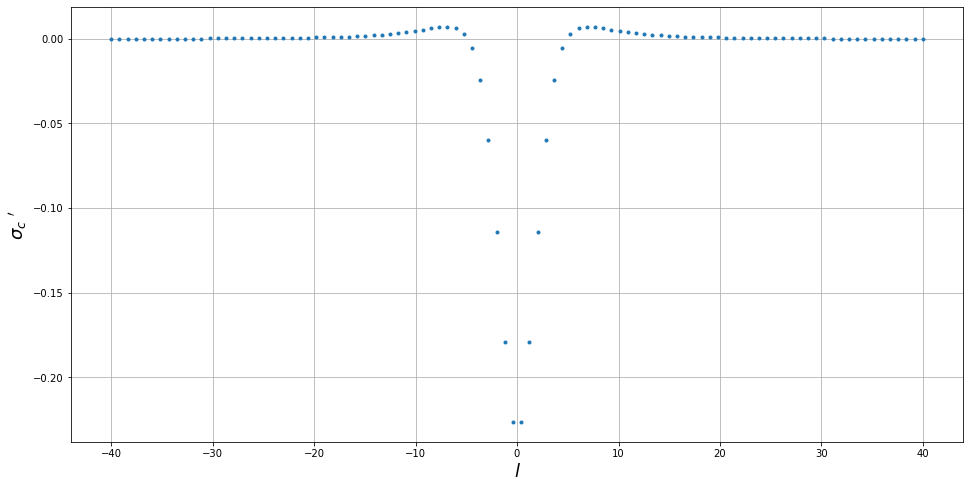

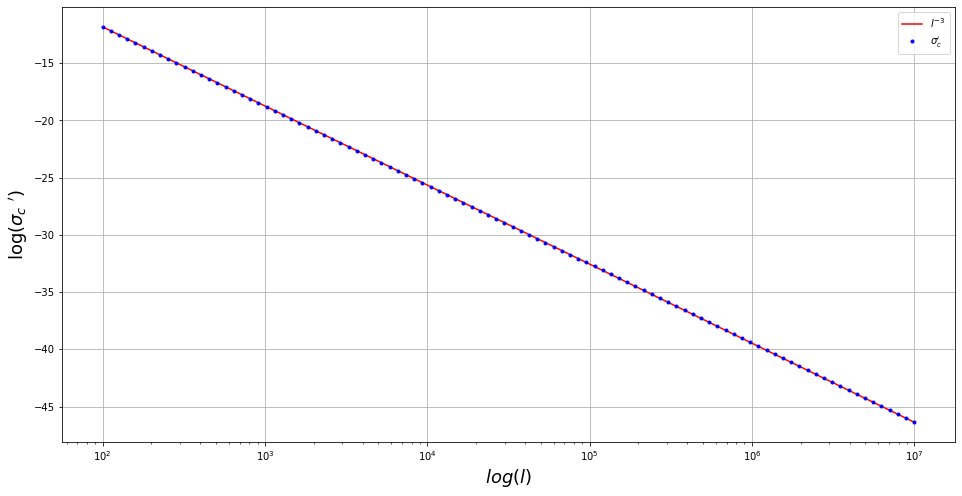

In [13]:
# Responda Aqui

#Função para calcular a densidade

def densidade(l,N):
    return -E(l,N)


l=np.linspace(-40,40,100)
sigma=np.empty(100)
for i in range(100):
    sigma[i]=densidade(l[i],500)

#Gráfico com a escala normal
plt.figure(figsize=(16,8))

plt.plot(l,sigma,".")

plt.xlabel("$l$",fontsize=18)
plt.ylabel("$\sigma_c \ '$",fontsize=18)
plt.grid()
plt.show()

#Gráfico com a escala logarítmica
l1=np.logspace(2,7,100)
sigma1=np.empty(100)
for i in range(100):
    sigma1[i]=densidade(l1[i],500)
    
plt.figure(figsize=(16,8))

dif=np.log(7.330382858376184)         #Correção segundo o modelo teórico para a distribuição de carga aproximada
                                      #Considerando r0=1
plt.plot(l1,np.log(l1**(-3))+dif,"r",label=r"$l^{-3}$")
plt.plot(l1,np.log(sigma1),"b.",label=r"$\sigma_c'$")

plt.grid()
plt.xlabel(r"$log(l)$",fontsize=18)
plt.ylabel(r"log($\sigma_c \ ')$",fontsize=18)
plt.xscale("log")
plt.legend()
plt.show()